# First Test

In [1]:
import infrared as ir

num_colors = 3
num_nodes = 4
edges = [(1,2),(1,4),(2,3),(3,4)]
cycles = [(1,2,3,4)]

## Set up the model

In [2]:
model = ir.Model()

# dummy variable to avoid index transformations
model.add_variables(1,(0,0))

# add one variable per node
model.add_variables(num_nodes,num_colors)

# define NotEquals constraints in Python
ir.def_constraint_class('NotEquals',
    lambda i,j: [i,j], # signature and dependencies
    lambda x, y: x!=y)  # constraint semantics

# add one inequality constraint per edge 
model.add_constraints(NotEquals(i,j) for i,j in edges)

# define cardinality for sets of 4 variables
ir.def_function_class('Card', # define "cardinality"
    lambda i, j, k, l: [i,j,k,l], # signature, dependencies
    lambda x,y,z,w: len({x,y,z,w}))  # function evaluation

# add the cardinality function for every cycle
model.add_functions([Card(i,j,k,l) for i,j,k,l in cycles], 'card')

model.set_feature_weight(-1,'card') # set up in order to *minimize*

solver = ir.Optimizer(model)
print(f'Tree width: {solver.treewidth()}')

Tree width: 3


## Draw the dependency graph

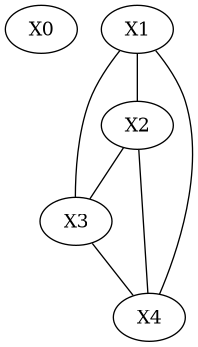

In [10]:
from IPython.display import Image
import re

# Plot dependency graph
filename = 'dependency_graph.dot'
model.write_graph(filename, True)

ir.dotfile_to_png(filename)
filename = re.sub(r"dot$","png",filename)

Image(filename=filename)

## Plot the tree decomposition

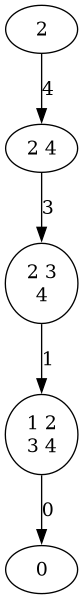

In [9]:
filename="treedecomp"
solver.plot_td(filename,'png')
Image(filename=filename+".png")

## Generate colorings

In [3]:
def assignment_to_coloring(a):
        colors=["red","green","blue"]
        coloring = {i:colors[v] for i,v in enumerate(a.values())}
        del coloring[0]
        return coloring

In [4]:
def plot_coloring(coloring, filename):
    import graphviz

    G = graphviz.Graph('coloring', engine="fdp")

    for i in range(1,num_nodes+1):
        G.node(f'{i}', style="filled", color=coloring[i])
    for i,j in edges:
        G.edge(f'{i}',f'{j}')

    G.render(filename, format='png', cleanup=True)

### Sampling with existing method sample()

Sampled coloring: {1: 'green', 2: 'blue', 3: 'green', 4: 'blue'}
Colors in cycles: 2


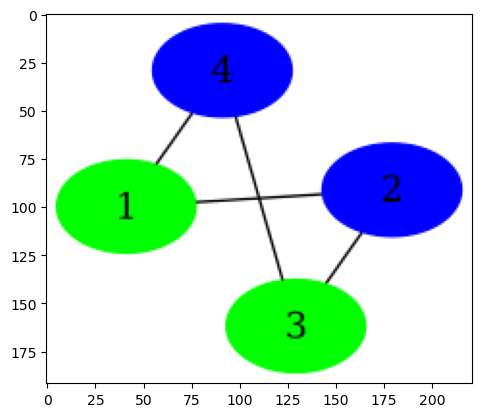

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
 
solver = ir.Sampler(model)
assignment = solver.sample()
coloring = assignment_to_coloring(assignment)

print('Sampled coloring:', coloring)
print('Colors in cycles:', model.eval_feature(assignment,'card'))

plot_coloring(coloring, f'graphs/colored_graph_0')
img = Image.open(f'graphs/colored_graph_0.png')
plt.imshow(img)
plt.show()

### Sampling with the new  test_sample()


Sample #1
sample id: 207
list of previous samples: []


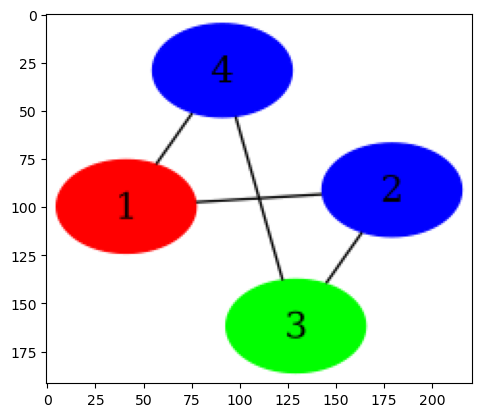


Sample #2
sample id: 57
list of previous samples: [207]


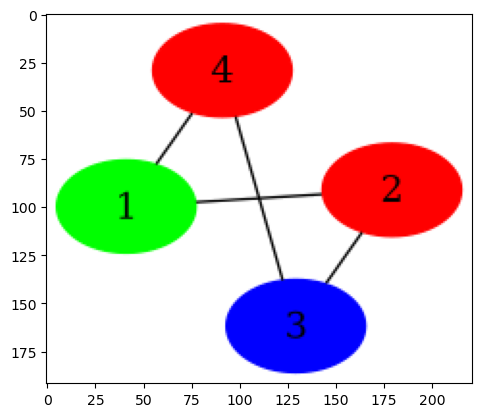


Sample #3
sample id: 192
list of previous samples: [207, 57]


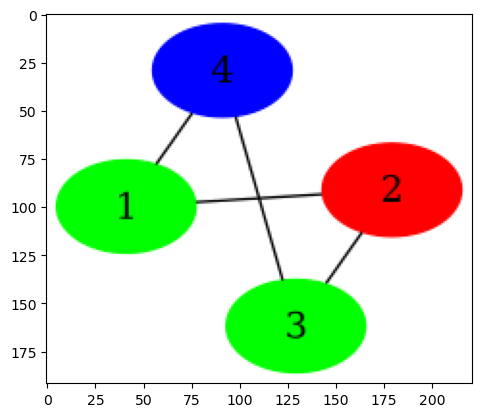


Sample #4
sample id: 210
list of previous samples: [207, 57, 192]


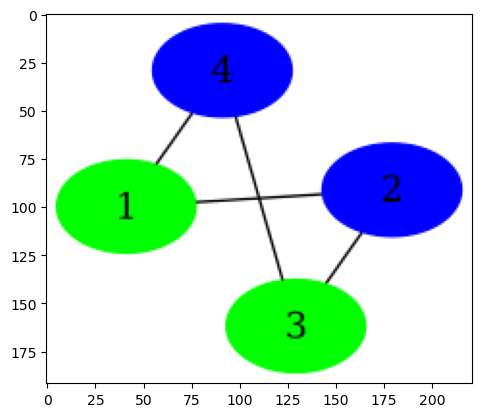


Sample #5
sample id: 171
list of previous samples: [207, 57, 192, 210]


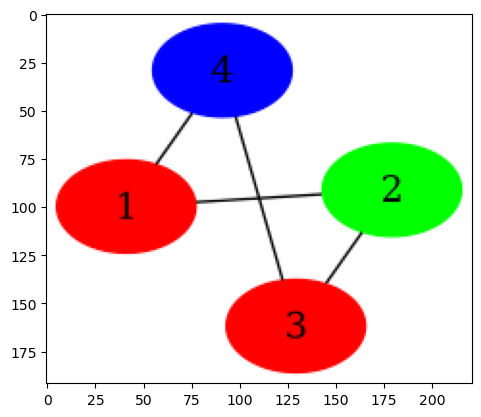


Sample #6
sample id: 210
list of previous samples: [207, 57, 192, 210, 171]
Aready sampled!

Sample #7
sample id: 96
list of previous samples: [207, 57, 192, 210, 171]


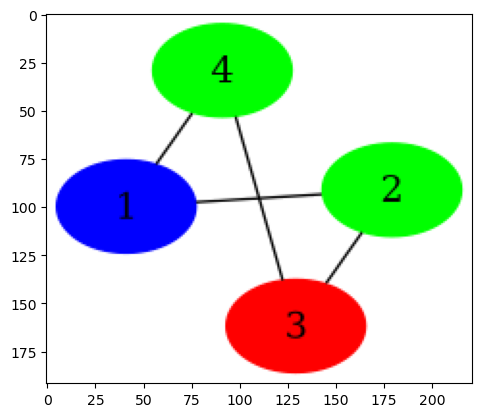


Sample #8
sample id: 30
list of previous samples: [207, 57, 192, 210, 171, 96]


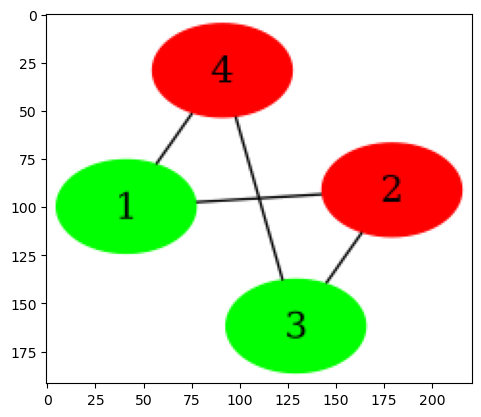


Sample #9
sample id: 207
list of previous samples: [207, 57, 192, 210, 171, 96, 30]
Aready sampled!

Sample #10
sample id: 96
list of previous samples: [207, 57, 192, 210, 171, 96, 30]
Aready sampled!

Sample #11
sample id: 30
list of previous samples: [207, 57, 192, 210, 171, 96, 30]
Aready sampled!

Sample #12
sample id: 183
list of previous samples: [207, 57, 192, 210, 171, 96, 30]


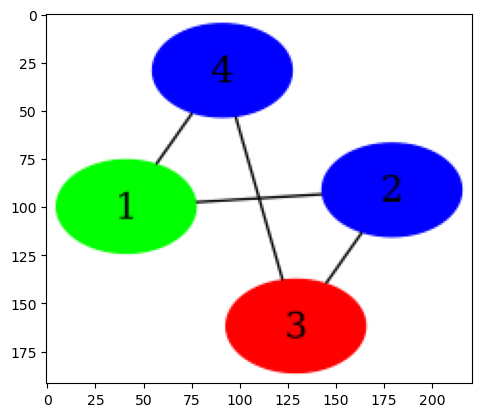


Sample #13
sample id: 180
list of previous samples: [207, 57, 192, 210, 171, 96, 30, 183]


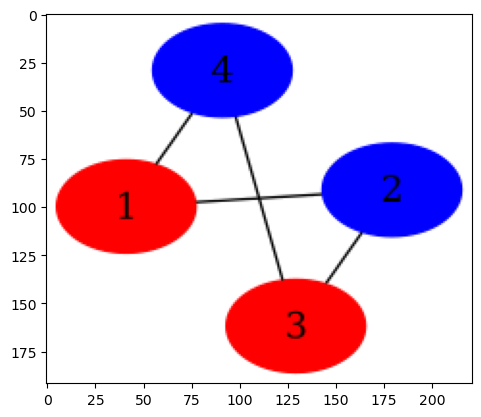


Sample #14
sample id: 99
list of previous samples: [207, 57, 192, 210, 171, 96, 30, 183, 180]


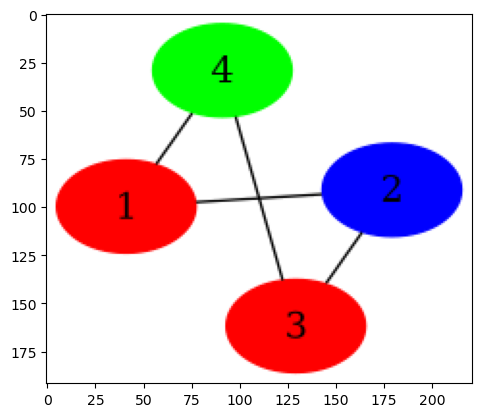


Sample #15
sample id: 96
list of previous samples: [207, 57, 192, 210, 171, 96, 30, 183, 180, 99]
Aready sampled!

Sample #16
sample id: 150
list of previous samples: [207, 57, 192, 210, 171, 96, 30, 183, 180, 99]


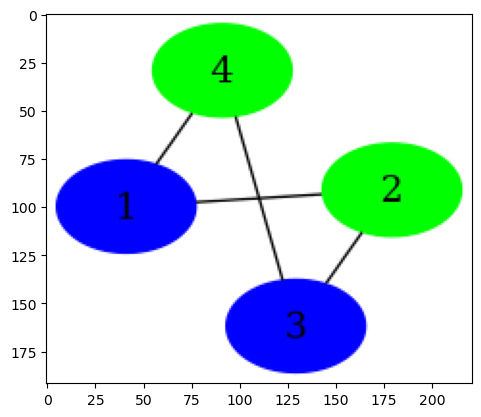


Sample #17
sample id: 150
list of previous samples: [207, 57, 192, 210, 171, 96, 30, 183, 180, 99, 150]
Aready sampled!

Sample #18
sample id: 48
list of previous samples: [207, 57, 192, 210, 171, 96, 30, 183, 180, 99, 150]


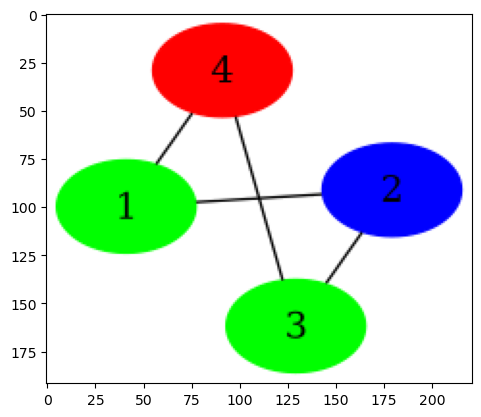


Sample #19
sample id: 180
list of previous samples: [207, 57, 192, 210, 171, 96, 30, 183, 180, 99, 150, 48]
Aready sampled!

Sample #20
sample id: 180
list of previous samples: [207, 57, 192, 210, 171, 96, 30, 183, 180, 99, 150, 48]
Aready sampled!


In [6]:
from PIL import Image
import matplotlib.pyplot as plt

for i in range(1, 21):
    print(f'\nSample #{i}')
    
    solver = ir.Sampler(model)
    assignment = solver.test_sample()

    if assignment:
        coloring = assignment_to_coloring(assignment)

        plot_coloring(coloring, f'graphs/colored_graph_{i}')
        img = Image.open(f'graphs/colored_graph_{i}.png')
        plt.imshow(img)
        plt.show()